# TFM Máster Data Science UAH 2020-2021

### MIGUEL PÉREZ CARO

Este notebook tiene como objetivo aplicar técnicas de análisis de sentimiento para analizar la interacción de los usuarios por Twitter hacia las aerolíneas. Para ello se hará uso del dataset limpiado, al cuál no se le han eliminado ni los emoticonos, ni los emojis, ni los signos de puntuación, ya que las técnicas que se van a usar son capaces de procesarlos. Dichas técnicas son dos librerías:

- TextBlob
- VADER

En primer lugar se importan las librerías.

In [1]:
import os
import re
import string
import pandas as pd
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
import warnings
warnings.filterwarnings('ignore')

Se establece el directorio del archivo

In [3]:
directorio = os.path.dirname(os.getcwd())
mydir = os.path.join(directorio, 'data')
os.chdir(mydir)

Se carga el archivo

In [4]:
df = pd.read_csv('df_sentiment_clean_no_dup.csv')

In [5]:
df.sample(5)

,id,created_at,text,retweet_count,favorite_count,southwest,american,united,delta
74355,1.445142e+18,2021-10-04 21:42:54,get knees ffs,0.0,3.0,0.0,0.0,0.0,1.0
10460,1.433060e+18,2021-09-01 13:31:23,another delay continues show incompetence disa...,0.0,0.0,0.0,0.0,1.0,0.0
191831,1.430339e+18,2021-08-25 01:18:24,surely youve written webisode even booked came...,0.0,1.0,0.0,1.0,0.0,0.0
203975,1.425667e+18,2021-08-12 03:55:52,thinking flying im nervous,0.0,0.0,0.0,0.0,1.0,0.0
214129,1.421733e+18,2021-08-01 07:21:29,united delta dayhonestly commercial airlines s...,0.0,0.0,0.0,0.0,1.0,1.0


##### TextBlob

TextBlob es una librería de procesamiento de lenguaje natural que, entre sus muchas funciones, incluye una para analizar el sentimiento de un documento. Su resultado consiste en un valor de polaridad cuyo rango es de -1 a 1, de forma que todo valor menor que 0 es considerado como un texto negativo, y todo valor mayor que 0 es considerado como un texto positivo.

Para conseguir el resultado deseado podemos hacerlo simplemente con la siguiente estructura:

In [6]:
df['textblob-sentiment'] = df['text'].apply(lambda text: TextBlob(text).sentiment.polarity)

A continuación, creamos otra columna para recoger el valor en texto, lo cual puede ser de utilidad para analizar los resultados.

In [7]:
def textblob_sentiment_texto(score): 
    """
    Función para pasar a texto el resultado del análisis de sentimiento.
    
    param: score el resultado del análisis.
    :return: Valor en texto del resultado
    """
    if score < 0:
        return 'Negativo'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positivo'

In [8]:
df['textblob-sentiment-analysis'] = df['textblob-sentiment'].apply(textblob_sentiment_texto)

##### VADER

VADER, a partir de su analizador de sentimientos, es capaz de devolver el sentimiento de un texto en un formato de diccionario con 4 elementos:

- neg: representa el resultado negativo. Rango de 0 a 1
- neu: representa el resultado neutral. Rango de 0 a 1
- pos: representa el resultado positivo. Rango de 0 a 1
- compound: es una métrica que calcula la suma de las valoraciones de todo el léxico normalizado al rango -1 a 1, consideranto negativo todo valor menor a -0.05 y positivo todo valor mayor a 0.05, siendo el resto neutro.

Por lo tanto, el dato que nos indicará el sentimiento del tweet es compound de forma que cuanto más cercano a -1, más negativo es el texto, y cuanto más cercano a 1, más positivo será el texto

El primer paso es crear el analizador de sentimientos a partir de la librería VADER

In [9]:
vader_analyzer = SentimentIntensityAnalyzer()

A continuación se crea una función para calcular el sentimiento de cada documento.

In [10]:
def vader_sentiment_analysis(text):
    """
    Función para calcular el sentimiento de los tweets a partir de la librería VADER.
    
    param: text texto a calcular su sentimiento.
    :return: vader_sentiment resultado compound del análisis.
    """
    vader_sentiment_full = vader_analyzer.polarity_scores(text)
    vader_sentiment = vader_sentiment_full['compound']
    return vader_sentiment

Generamos una nueva columna en el dataframe con el valor compound del análisis realizado.

In [11]:
df['vader-sentiment'] = df['text'].apply(vader_sentiment_analysis)

Nuevamente, generamos una columna para traducir el número a texto.

In [12]:
def vader_sentiment_texto(score): 
    """
    Función para pasar a texto el resultado del análisis de sentimiento.
    
    param: score el resultado del análisis.
    :return: Valor en texto del resultado
    """
    if score < -0.05:
        return 'Negativo'
    elif score > 0.05:
        return 'Positivo'
    else:
        return 'Neutral'

In [13]:
df['vader-sentiment-analysis'] = df['vader-sentiment'].apply(vader_sentiment_texto)

In [14]:
df.sample(10)

,id,created_at,text,retweet_count,favorite_count,southwest,american,united,delta,textblob-sentiment,textblob-sentiment-analysis,vader-sentiment,vader-sentiment-analysis
138060,1.428122e+18,2021-08-18 22:29:06,need drink tickets damn rebooking flight layover,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,Neutral,-0.4019,Negativo
163674,1.428457e+18,2021-08-19 20:41:12,racial refused acknowledge,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,Neutral,-0.2960,Negativo
30049,1.443276e+18,2021-09-29 18:05:42,changes flight las vegas one stop different ai...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,Neutral,-0.4340,Negativo
42184,1.428900e+18,2021-08-21 02:01:04,definitely leave hawaii november ill back ga e...,0.0,1.0,0.0,0.0,0.0,1.0,-0.166667,Negativo,-0.0772,Negativo
199092,1.428200e+18,2021-08-19 03:40:59,thanks leaving denver,0.0,3.0,0.0,0.0,1.0,0.0,0.200000,Positivo,0.4404,Positivo
135248,1.433494e+18,2021-09-02 18:17:32,much cant stand airlines paying cent united re...,0.0,1.0,0.0,0.0,1.0,0.0,0.200000,Positivo,0.4215,Positivo
3705,1.445548e+18,2021-10-06 00:32:46,ahhso yo,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,Neutral,0.0000,Neutral
99218,1.422808e+18,2021-08-04 06:34:42,hoping delta plus like antivaxxer free first c...,0.0,0.0,0.0,0.0,0.0,1.0,0.050000,Positivo,0.6705,Positivo
102558,1.419698e+18,2021-07-26 16:34:51,idk still looking costa rica looking cheap,0.0,0.0,0.0,0.0,1.0,0.0,0.400000,Positivo,-0.1027,Negativo
15215,1.427428e+18,2021-08-17 00:33:16,awhile since issues traveling latest coming ho...,0.0,0.0,0.0,0.0,0.0,1.0,0.500000,Positivo,0.0000,Neutral


En la muestra anterior se pueden comprobar las nuevas columnas que recogen los valores del análisis de sentimiento.

### Resultados

En este apartado se pretende analizar los resultados obtenidos con ambas técnicas y compararlos. 

#### Diferente Sentimiento

En primer lugar, se comienza por ver las diferencias entre ambos analizadores de sentimientos.

In [15]:
df_diff = df[df['textblob-sentiment-analysis'] != df['vader-sentiment-analysis']]

In [16]:
print('''Hay {} tweets cuyo análisis de sentimiento difiere entre ambos analizadores de un total de {} tweets, lo que 
corresponde a un {}% del total de tweets'''.format(df_diff.shape[0],df.shape[0],round(df_diff.shape[0]/df.shape[0]*100,2)))

Hay 103145 tweets cuyo análisis de sentimiento difiere entre ambos analizadores de un total de 242419 tweets, lo que 
corresponde a un 42.55% del total de tweets


Se va a mostrar por pantalla 10 registros aleatorios para comprobar dichas diferencias

In [17]:
df_diff.sample(10)

,id,created_at,text,retweet_count,favorite_count,southwest,american,united,delta,textblob-sentiment,textblob-sentiment-analysis,vader-sentiment,vader-sentiment-analysis
213958,1.428471e+18,2021-08-19 21:37:02,united asks flight attendants tape passengers ...,0.0,0.0,0.0,0.0,1.0,0.0,0.00000,Neutral,0.4215,Positivo
151389,1.422363e+18,2021-08-03 01:06:19,otherhand flight attendant crew fight mcogtbwi...,0.0,0.0,1.0,0.0,0.0,0.0,0.20000,Positivo,-0.3818,Negativo
12197,1.442249e+18,2021-09-26 22:05:55,app youre going allow foreign addresses maybe ...,0.0,0.0,1.0,0.0,0.0,0.0,-0.12500,Negativo,0.4215,Positivo
32934,1.427980e+18,2021-08-18 13:07:14,come fly us also cancels reservation without n...,0.0,0.0,0.0,1.0,0.0,0.0,0.80000,Positivo,-0.2263,Negativo
210594,1.437279e+18,2021-09-13 04:55:38,trying please sides maybe one likely turn well...,0.0,0.0,1.0,0.0,0.0,1.0,0.00000,Neutral,0.2263,Positivo
35208,1.432462e+18,2021-08-30 21:56:44,consistently surprises many people still fly p...,0.0,0.0,0.0,1.0,0.0,0.0,0.29375,Positivo,-0.3400,Negativo
158259,1.431074e+18,2021-08-27 02:01:58,please put edinburgh flight back,0.0,0.0,0.0,0.0,1.0,0.0,0.00000,Neutral,0.3182,Positivo
115310,1.438637e+18,2021-09-16 22:53:32,know exactly dont try deflect embrace,0.0,0.0,0.0,1.0,0.0,0.0,0.25000,Positivo,-0.2411,Negativo
28596,1.441036e+18,2021-09-23 13:44:36,case anyone wondering never fly literally wors...,1.0,3.0,0.0,1.0,0.0,0.0,-0.70000,Negativo,0.7090,Positivo
231233,1.437175e+18,2021-09-12 22:02:47,worries year old mother ate screwing making tot,0.0,1.0,0.0,0.0,1.0,0.0,0.10000,Positivo,-0.5719,Negativo


Para analizar cuál es la combinación de sentimientos diferentes que más se sucede, se van a juntar ambas columnas creando una nueva para luego contabilizar el número de veces que aparece cada combinación:

In [18]:
df_diff['different-sentiment'] = df_diff['textblob-sentiment-analysis'] + '-' + df_diff['vader-sentiment-analysis']
df_diff.head()

,id,created_at,text,retweet_count,favorite_count,southwest,american,united,delta,textblob-sentiment,textblob-sentiment-analysis,vader-sentiment,vader-sentiment-analysis,different-sentiment
3,1.441256e+18,2021-09-24 04:17:53,aaaaaaaaaand course helping,0.0,2.0,0.0,0.0,0.0,1.0,0.00,Neutral,0.2960,Positivo,Neutral-Positivo
4,1.440869e+18,2021-09-23 02:42:00,aaaaaaaand leave completely hose entire trip d...,0.0,4.0,0.0,1.0,0.0,0.0,0.05,Positivo,-0.0516,Negativo,Positivo-Negativo
5,1.443650e+18,2021-09-30 18:52:45,aaaaaaaaugh fucking planning fucking trips fuc...,0.0,3.0,0.0,0.0,0.0,1.0,-0.60,Negativo,0.0000,Neutral,Negativo-Neutral
7,1.432132e+18,2021-08-30 00:05:21,aaaaaaand moment plane stops everyone pops sea...,3.0,109.0,0.0,0.0,0.0,1.0,0.00,Neutral,-0.1531,Negativo,Neutral-Negativo
8,1.432133e+18,2021-08-30 00:07:09,aaaaaaand moment plane stops everyone pops sea...,3.0,0.0,0.0,0.0,0.0,1.0,0.00,Neutral,-0.1531,Negativo,Neutral-Negativo


In [19]:
df_diff['different-sentiment'].value_counts()

Neutral-Positivo     30899
Neutral-Negativo     24085
Positivo-Neutral     18923
Positivo-Negativo    12738
Negativo-Positivo     8395
Negativo-Neutral      8105
Name: different-sentiment, dtype: int64

La principal conclusión que se obtiene de estos valores es que el análisis de textblob es menos sensible que el de vader, ya que, a pesar de que este último tiene un rango mayor para asignar un texto como Neutral, se aprecia que la mayoría de las diferencias surgen porque textblob analiza como Neutro, mientras que Vader sí que detecta un sentimiento en dicho texto, ya sea negativo o positivo, por lo que se entiende que es más sensible a detectar sentimientos.

También es llamativo los 21133 tweets que son clasificados por uno como negativo mientras que por otro como positivo, o viceversa.

Para analizar más las diferencias que se producen, se puede calcular la media de las diferencias entre los resultados numéricos que se asignaron por textblob y por vader a la hora de analizar el documento, que puede dar una idea de la diferencia que existe para combinación de los análisis que difieren.

In [20]:
def get_mean_difference(df, difference):
    """
    Función para obtener la diferencia entre los análisis de sentimiento de TextBlob y VADER.
    
    param: df dataframe que contiene los análisis
    param: difference combinación de sentimientos
    :return: lista con la diferencias y la media de la misma
    """
    df = df[df['different-sentiment'] == difference]
    if difference == 'Neutral-Positivo' or difference == 'Neutral-Negativo' or difference == 'Positivo-Negativo' or difference == 'Negativo-Positivo':
        difference_list = list(abs(df['textblob-sentiment'] + df['vader-sentiment']))
    elif difference == 'Positivo-Neutral' or difference == 'Negativo-Neutral':
        difference_list = list(abs(df['textblob-sentiment'] - df['vader-sentiment']))
    mean = round(sum(difference_list)/len(difference_list),2)
    return difference_list, mean

In [21]:
different_sentiment = ['Neutral-Positivo', 'Neutral-Negativo', 'Positivo-Neutral', 'Positivo-Negativo', 
                       'Negativo-Positivo', 'Negativo-Neutral']

difference_list = []
mean_list = []

for i in different_sentiment:
    difference, mean = get_mean_difference(df_diff, i)
    difference_list = difference_list + difference
    mean_list.append(mean)

In [22]:
difference_dict = dict(zip(different_sentiment, mean_list))
difference_dict

{'Neutral-Positivo': 0.39,
 'Neutral-Negativo': 0.37,
 'Positivo-Neutral': 0.28,
 'Positivo-Negativo': 0.25,
 'Negativo-Positivo': 0.25,
 'Negativo-Neutral': 0.21}

In [23]:
print("""La media de la diferencia total entre los valores numéricos asignados por TextBlob y VADER en los registros 
donde no coincide el sentimiento es de {}""".format(round(sum(difference_list)/len(difference_list),2)))

La media de la diferencia total entre los valores numéricos asignados por TextBlob y VADER en los registros 
donde no coincide el sentimiento es de 0.32


Los valores obtenidos demuestran que donde se produce una mayor diferencia es cuando TextBlob no detecta ningún tipo de sentimiento, demostrando que VADER es más sensible, llegando a detectar unos valores considerables. Por otro lado, cuando el sentimiento detectado es justo el contrario, el valor es considerablemente menor, por lo que son textos cuyo valor numérico referido al sentimiento no es muy lejano, pero de signo diferente. En los casos en los que VADER asigna un valor neutral, también se aprecia una media baja, por lo que TextBlob detecta sentimiento pero no tiene un valor muy alto.

#### Resultados Totales por Analizador y Aerolínea

A continuación se pretende mostrar los resultados obtenidos por ambos analizadores para conocer la cantidad de tweets positivos, negativos y neutros que se recibe por aerolínea.

Primero se genera un dataframe por aerolínea.

In [24]:
df_american = df[df['american']>0]
df_delta = df[df['delta']>0]
df_southwest = df[df['southwest']>0]
df_united = df[df['united']>0]

Se generan los gráficos con los valores totales:

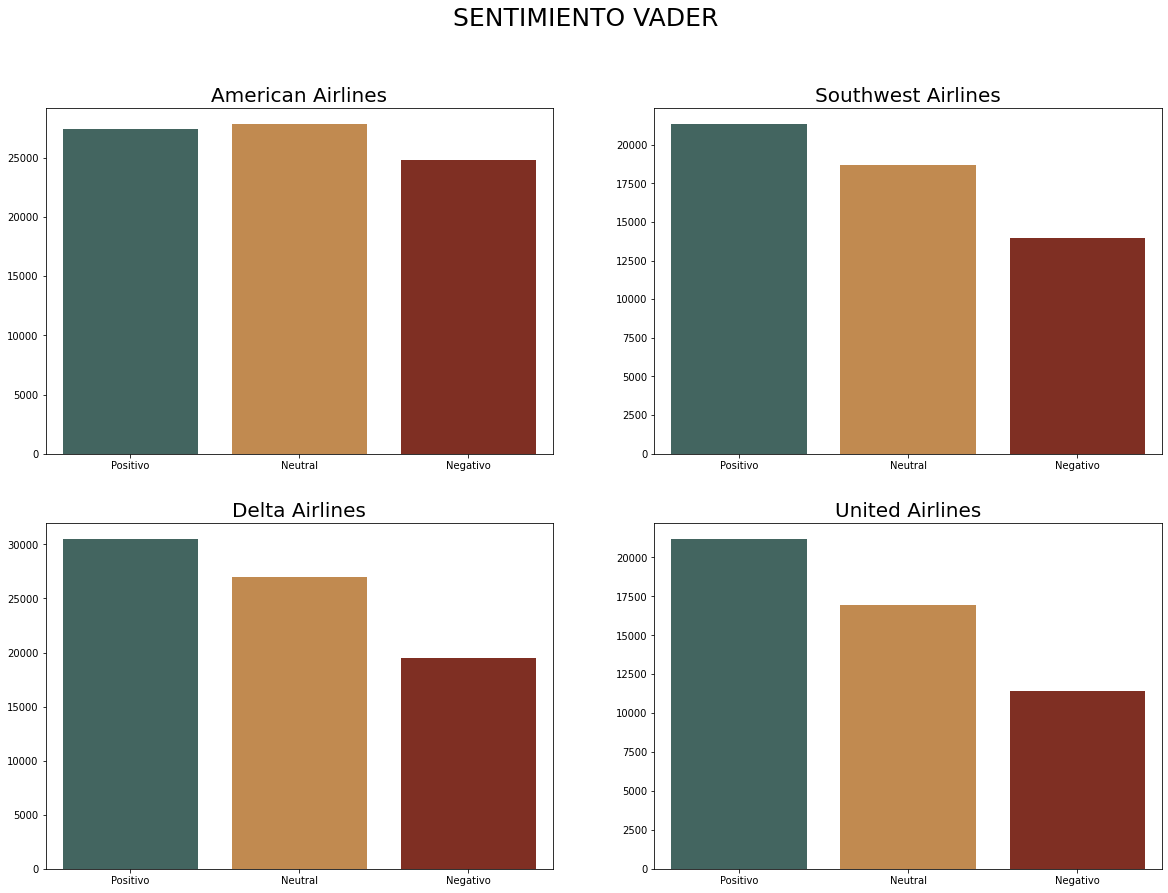

In [25]:
# Se establece la figura y los ejes
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(20,14)
fig.suptitle('SENTIMIENTO VADER', fontsize=25)

# Se crean los gráficos
sns.countplot(x = "vader-sentiment-analysis", data = df_american, ax = ax[0, 0], 
              palette = dict(Negativo="#8e2414", Positivo="#3d6b64", Neutral="#d48b3d"), 
              order = ['Positivo', 'Neutral', 'Negativo']).set_title('American Airlines', fontsize = 20);
sns.countplot(x = "vader-sentiment-analysis", data = df_delta, ax = ax[1, 0], 
              palette = dict(Negativo="#8e2414", Positivo="#3d6b64", Neutral="#d48b3d"), 
              order = ['Positivo', 'Neutral', 'Negativo']).set_title('Delta Airlines', fontsize = 20);
sns.countplot(x = "vader-sentiment-analysis", data = df_southwest, ax = ax[0, 1], 
              palette = dict(Negativo="#8e2414", Positivo="#3d6b64", Neutral="#d48b3d"), 
              order = ['Positivo', 'Neutral', 'Negativo']).set_title('Southwest Airlines', fontsize = 20);
sns.countplot(x = "vader-sentiment-analysis", data = df_united, ax = ax[1, 1], 
              palette = dict(Negativo="#8e2414", Positivo="#3d6b64", Neutral="#d48b3d"), 
              order = ['Positivo', 'Neutral', 'Negativo']).set_title('United Airlines', fontsize = 20);

# Se eliminan las etiquestas de los ejes al no considerarse necesarias
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('')
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')

plt.savefig('sentimiento-vader-numeros-totales-2.pdf')
plt.show()

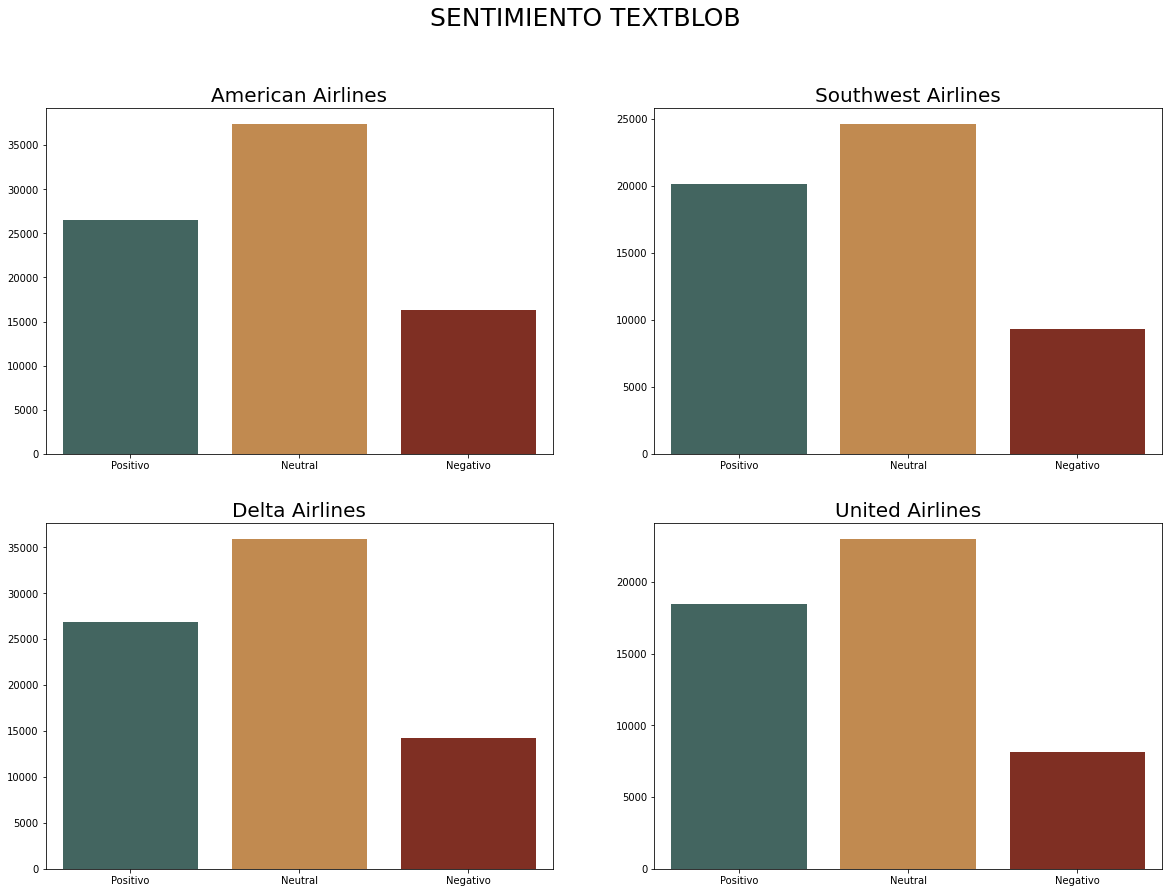

In [26]:
# Se establece la figura y los ejes
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(20,14)
fig.suptitle('SENTIMIENTO TEXTBLOB', fontsize=25)

# Se crean los gráficos
sns.countplot(x = "textblob-sentiment-analysis", data = df_american, ax = ax[0, 0], 
              palette = dict(Negativo="#8e2414", Positivo="#3d6b64", Neutral="#d48b3d"), 
              order = ['Positivo', 'Neutral', 'Negativo']).set_title('American Airlines', fontsize = 20);
sns.countplot(x = "textblob-sentiment-analysis", data = df_delta, ax = ax[1, 0], 
              palette = dict(Negativo="#8e2414", Positivo="#3d6b64", Neutral="#d48b3d"), 
              order = ['Positivo', 'Neutral', 'Negativo']).set_title('Delta Airlines', fontsize = 20);
sns.countplot(x = "textblob-sentiment-analysis", data = df_southwest, ax = ax[0, 1], 
              palette = dict(Negativo="#8e2414", Positivo="#3d6b64", Neutral="#d48b3d"), 
              order = ['Positivo', 'Neutral', 'Negativo']).set_title('Southwest Airlines', fontsize = 20);
sns.countplot(x = "textblob-sentiment-analysis", data = df_united, ax = ax[1, 1], 
              palette = dict(Negativo="#8e2414", Positivo="#3d6b64", Neutral="#d48b3d"), 
              order = ['Positivo', 'Neutral', 'Negativo']).set_title('United Airlines', fontsize = 20);

# Se eliminan las etiquestas de los ejes al no considerarse necesarias
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('')
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')

plt.savefig('sentimiento-textblob-numeros-totales-2.pdf')
plt.show()

Aparte de los gráficos, también se muestran los números totales en formato gráfica para un mayor entendimiento. Primero para VADER:

In [27]:
columns = ['Positivo', 'Neutral', 'Negativo', 'Total']
rows = ['American Airlines', 'Delta Airlines', 'Southwest Airlines', 'United Airlines']

data = [list(df_american['vader-sentiment-analysis'].value_counts().sort_index(ascending = False).values) + [df_american.shape[0]],
        list(df_delta['vader-sentiment-analysis'].value_counts().sort_index(ascending = False).values) + [df_delta.shape[0]],
        list(df_southwest['vader-sentiment-analysis'].value_counts().sort_index(ascending = False).values) + [df_southwest.shape[0]],
        list(df_united['vader-sentiment-analysis'].value_counts().sort_index(ascending = False).values) + [df_united.shape[0]]]

df_sentiment_totales_vader = pd.DataFrame(data, columns = columns, index = rows)
df_sentiment_totales_vader.head()

,Positivo,Neutral,Negativo,Total
American Airlines,27480,27846,24837,80163
Delta Airlines,30464,27016,19471,76951
Southwest Airlines,21329,18686,13983,53998
United Airlines,21162,16962,11451,49575


Se guarda en formato csv:

In [28]:
df_sentiment_totales_vader.to_csv('df_sentiment_totales_vader-2.csv', index = True)

A continuación se hace lo mismo para TextBlob:

In [29]:
columns = ['Positivo', 'Neutral', 'Negativo', 'Total']
rows = ['American Airlines', 'Delta Airlines', 'Southwest Airlines', 'United Airlines']

data = [list(df_american['textblob-sentiment-analysis'].value_counts().sort_index(ascending = False).values) + [df_american.shape[0]],
        list(df_delta['textblob-sentiment-analysis'].value_counts().sort_index(ascending = False).values) + [df_delta.shape[0]],
        list(df_southwest['textblob-sentiment-analysis'].value_counts().sort_index(ascending = False).values) + [df_southwest.shape[0]],
        list(df_united['textblob-sentiment-analysis'].value_counts().sort_index(ascending = False).values) + [df_united.shape[0]]]

df_sentiment_totales_textblob = pd.DataFrame(data, columns = columns, index = rows)
df_sentiment_totales_textblob.head()

,Positivo,Neutral,Negativo,Total
American Airlines,26510,37385,16268,80163
Delta Airlines,26849,35877,14225,76951
Southwest Airlines,20090,24576,9332,53998
United Airlines,18444,22963,8168,49575


In [30]:
df_sentiment_totales_textblob.to_csv('df_sentiment_totales_textblob-2.csv', index = True)

Las conclusiones que se pueden extraer de los números totales obtenidos es que, en primer lugar, American Airlines y Delta son las que tienen una mayor interacción por Twitter, seguidas por Southwest y por último United. Analizando los resultados por clasificador:

- VADER: para todas las aerolíneas los valores positivos superan a los negativos, lo cuál es una buena señal, pero que requiere un análisis más profundo que se llevará a cabo posteriomente. También se evidencia lo comentado anteriormente con respecto a la sensibilidad del clasificador ya que la mayoría son tweets positivos, lo que contrasta con los valores del otro analizador.


- TextBlob: en este caso la mayoría de tweets con clasificados como neutros, con una gran diferencia, por lo que es menos sensible a la hora de detectar sentimientos. Aunque con números totales más bajos, también se evidencia una clara superioridad en el número de positivos comparados con los negativos

Se generan en porcentaje respecto al total para cada categoría:

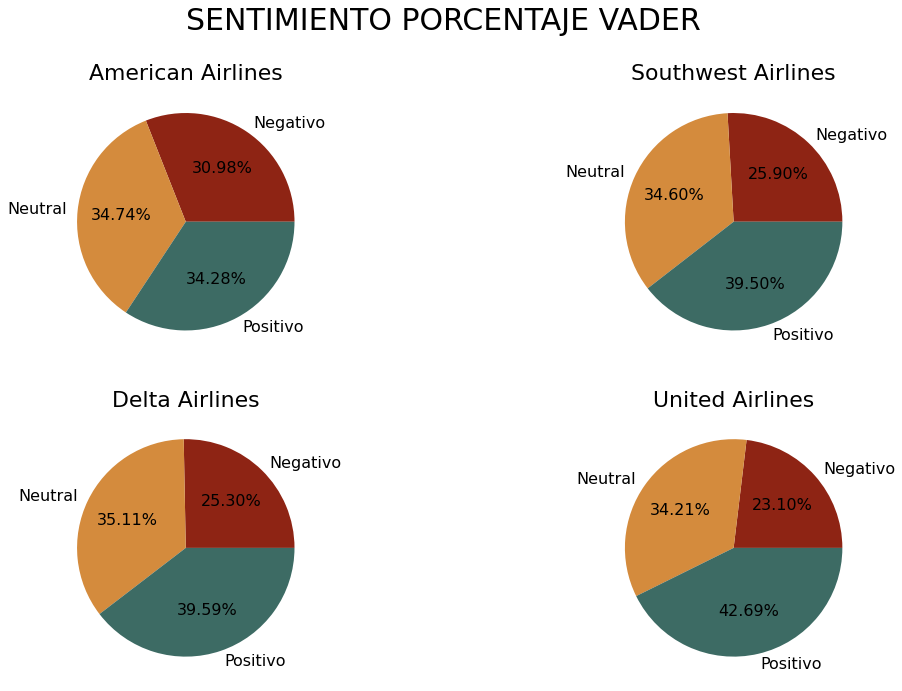

In [31]:
# Se establece la figura y los ejes
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(18,11)
fig.suptitle('SENTIMIENTO PORCENTAJE VADER', fontsize=30)

# Se crean los gráficos
ax[0,0].pie(list(df_american['vader-sentiment-analysis'].value_counts().sort_index().values),
            labels = list(df_american['vader-sentiment-analysis'].value_counts().sort_index().index), 
            autopct='%.2f%%', colors = ["#8e2414", "#d48b3d", "#3d6b64"], textprops={'fontsize': 16})
ax[0,0].set_title('American Airlines', fontsize = 22)

ax[1,0].pie(list(df_delta['vader-sentiment-analysis'].value_counts().sort_index().values),
            labels = list(df_delta['vader-sentiment-analysis'].value_counts().sort_index().index), 
            autopct='%.2f%%', colors = ["#8e2414", "#d48b3d", "#3d6b64"], textprops={'fontsize': 16})
ax[1,0].set_title('Delta Airlines', fontsize = 22)

ax[0,1].pie(list(df_southwest['vader-sentiment-analysis'].value_counts().sort_index().values),
            labels = list(df_southwest['vader-sentiment-analysis'].value_counts().sort_index().index), 
            autopct='%.2f%%', colors = ["#8e2414", "#d48b3d", "#3d6b64"], textprops={'fontsize': 16})
ax[0,1].set_title('Southwest Airlines', fontsize = 22)

ax[1,1].pie(list(df_united['vader-sentiment-analysis'].value_counts().sort_index().values),
            labels = list(df_united['vader-sentiment-analysis'].value_counts().sort_index().index), 
            autopct='%.2f%%', colors = ["#8e2414", "#d48b3d", "#3d6b64"], textprops={'fontsize': 16})
ax[1,1].set_title('United Airlines', fontsize = 22)

plt.savefig('sentimiento-vader-porcentajes-2.pdf')
plt.show()

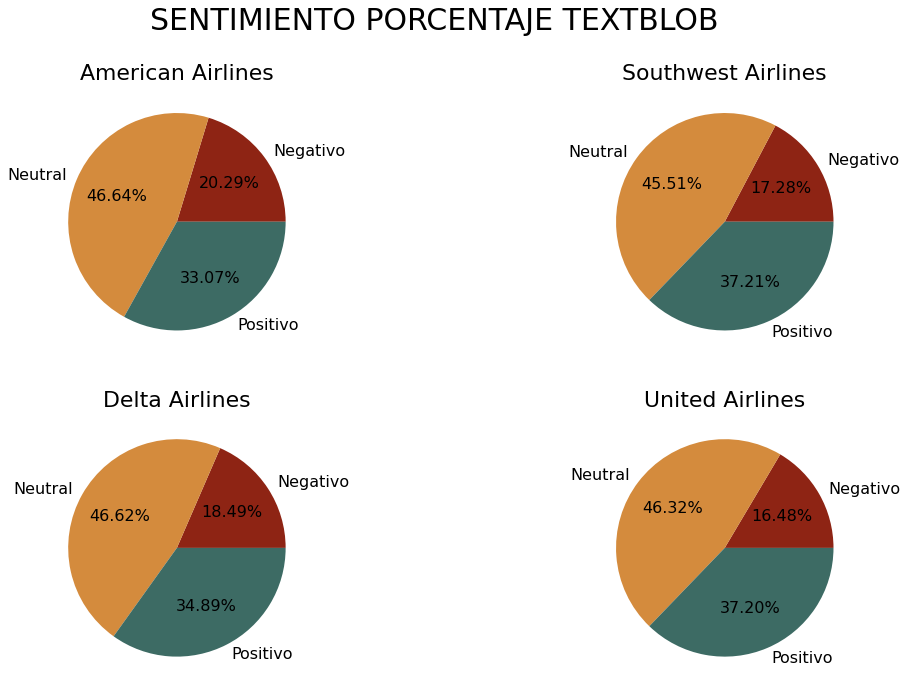

In [32]:
# Se establece la figura y los ejes
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(18,11)
fig.suptitle('SENTIMIENTO PORCENTAJE TEXTBLOB', fontsize=30)

# Se crean los gráficos
ax[0,0].pie(list(df_american['textblob-sentiment-analysis'].value_counts().sort_index().values),
            labels = list(df_american['textblob-sentiment-analysis'].value_counts().sort_index().index), 
            autopct='%.2f%%', colors = ["#8e2414", "#d48b3d", "#3d6b64"], textprops={'fontsize': 16})
ax[0,0].set_title('American Airlines', fontsize = 22)

ax[1,0].pie(list(df_delta['textblob-sentiment-analysis'].value_counts().sort_index().values),
            labels = list(df_delta['textblob-sentiment-analysis'].value_counts().sort_index().index), 
            autopct='%.2f%%', colors = ["#8e2414", "#d48b3d", "#3d6b64"], textprops={'fontsize': 16})
ax[1,0].set_title('Delta Airlines', fontsize = 22)

ax[0,1].pie(list(df_southwest['textblob-sentiment-analysis'].value_counts().sort_index().values),
            labels = list(df_southwest['textblob-sentiment-analysis'].value_counts().sort_index().index), 
            autopct='%.2f%%', colors = ["#8e2414", "#d48b3d", "#3d6b64"], textprops={'fontsize': 16})
ax[0,1].set_title('Southwest Airlines', fontsize = 22)

ax[1,1].pie(list(df_united['textblob-sentiment-analysis'].value_counts().sort_index().values),
            labels = list(df_united['textblob-sentiment-analysis'].value_counts().sort_index().index), 
            autopct='%.2f%%', colors = ["#8e2414", "#d48b3d", "#3d6b64"], textprops={'fontsize': 16})
ax[1,1].set_title('United Airlines', fontsize = 22)

plt.savefig('sentimiento-textblob-porcentajes-2.pdf')
plt.show()

Los porcentajes ayudan a conocer como se distribuyen los sentimientos por aerolínea para cada sentimiento:

- VADER: el porcentaje de tweets neutros es muy similar en todos lo casos, exisitiendo diferencias en los porcentajes positivos y negativos, donde se aprecia como American Airlines es la aerolínea con un mayor porcentaje negativo, por lo que se entiende que es la que recibe más críticas/quejas por Twitter, mientras que United, que es la que tiene una interacción menor, pero es la más positiva. En cuanto a Southwest y Delta tienen una interacción muy similar, pero algo mejor en el caso de Delta.


- TextBlob: las conclusiones que se pueden sacar son muy similares. El porcentaje de tweets clasificados como neutros para cada aerolínea es prácticamente el mismo. Nuevamente American Airlines es la que recibe una peor crítica, aunque con una menor diferencia que en el caso anterior. United vuelve a ser la que recibe una mejor crítica, pero sin mucha diferencia, mientras que Delta y Southwest en este caso no son tan similares, y Southwest tiene una interacción más positiva, equiparable a la de United. También cabe destacar que los resultados en este caso son más parejos que en el anterior.

#### Media por Sentimiento y Aerolínea

Para cada aerolínea se pretende obtener la media de los valores numéricos de cada sentimiento, con el objetivo de no conocer solo la cantidad de tweets totales que se han clasificado en un sentimiento, sino conocer el valor numérico con el que se han clasificado.

Primero se obtienen los valores para VADER:

In [33]:
columns = ['Positivo', 'Neutral', 'Negativo', 'Total']
rows = ['American Airlines', 'Delta Airlines', 'Southwest Airlines', 'United Airlines']

data = [[round(df_american['vader-sentiment'][df_american['vader-sentiment-analysis'] == 'Positivo'].mean(),3),
         round(df_american['vader-sentiment'][df_american['vader-sentiment-analysis'] == 'Neutral'].mean(),3),
         round(df_american['vader-sentiment'][df_american['vader-sentiment-analysis'] == 'Negativo'].mean(),3),
         round(df_american['vader-sentiment'].mean(),3)],
        [round(df_delta['vader-sentiment'][df_delta['vader-sentiment-analysis'] == 'Positivo'].mean(),3),
         round(df_delta['vader-sentiment'][df_delta['vader-sentiment-analysis'] == 'Neutral'].mean(),3),
         round(df_delta['vader-sentiment'][df_delta['vader-sentiment-analysis'] == 'Negativo'].mean(),3),
         round(df_delta['vader-sentiment'].mean(),3)],
        [round(df_southwest['vader-sentiment'][df_southwest['vader-sentiment-analysis'] == 'Positivo'].mean(),3),
         round(df_southwest['vader-sentiment'][df_southwest['vader-sentiment-analysis'] == 'Neutral'].mean(),3),
         round(df_southwest['vader-sentiment'][df_southwest['vader-sentiment-analysis'] == 'Negativo'].mean(),3),
         round(df_southwest['vader-sentiment'].mean(),3)],
        [round(df_united['vader-sentiment'][df_united['vader-sentiment-analysis'] == 'Positivo'].mean(),3),
         round(df_united['vader-sentiment'][df_united['vader-sentiment-analysis'] == 'Neutral'].mean(),3),
         round(df_united['vader-sentiment'][df_united['vader-sentiment-analysis'] == 'Negativo'].mean(),3),
         round(df_united['vader-sentiment'].mean(),3)]]

df_vader_sentiment_mean = pd.DataFrame(data, columns = columns, index = rows)
df_vader_sentiment_mean.head()

,Positivo,Neutral,Negativo,Total
American Airlines,0.448,0.0,-0.429,0.021
Delta Airlines,0.467,0.0,-0.408,0.082
Southwest Airlines,0.473,0.0,-0.406,0.082
United Airlines,0.483,0.0,-0.410,0.111


In [34]:
df_vader_sentiment_mean.to_csv('df_vader_sentiment_mean-2.csv', index = True)

Ahora se obtienen para TextBlob:

In [35]:
columns = ['Positivo', 'Neutral', 'Negativo', 'Total']
rows = ['American Airlines', 'Delta Airlines', 'Southwest Airlines', 'United Airlines']

data = [[round(df_american['textblob-sentiment'][df_american['textblob-sentiment-analysis'] == 'Positivo'].mean(),3),
         round(df_american['textblob-sentiment'][df_american['textblob-sentiment-analysis'] == 'Neutral'].mean(),3),
         round(df_american['textblob-sentiment'][df_american['textblob-sentiment-analysis'] == 'Negativo'].mean(),3),
         round(df_american['textblob-sentiment'].mean(),3)],
        [round(df_delta['textblob-sentiment'][df_delta['textblob-sentiment-analysis'] == 'Positivo'].mean(),3),
         round(df_delta['textblob-sentiment'][df_delta['textblob-sentiment-analysis'] == 'Neutral'].mean(),3),
         round(df_delta['textblob-sentiment'][df_delta['textblob-sentiment-analysis'] == 'Negativo'].mean(),3),
         round(df_delta['textblob-sentiment'].mean(),3)],
        [round(df_southwest['textblob-sentiment'][df_southwest['textblob-sentiment-analysis'] == 'Positivo'].mean(),3),
         round(df_southwest['textblob-sentiment'][df_southwest['textblob-sentiment-analysis'] == 'Neutral'].mean(),3),
         round(df_southwest['textblob-sentiment'][df_southwest['textblob-sentiment-analysis'] == 'Negativo'].mean(),3),
         round(df_southwest['textblob-sentiment'].mean(),3)],
        [round(df_united['textblob-sentiment'][df_united['textblob-sentiment-analysis'] == 'Positivo'].mean(),3),
         round(df_united['textblob-sentiment'][df_united['textblob-sentiment-analysis'] == 'Neutral'].mean(),3),
         round(df_united['textblob-sentiment'][df_united['textblob-sentiment-analysis'] == 'Negativo'].mean(),3),
         round(df_united['textblob-sentiment'].mean(),3)]]

df_textblob_sentiment_mean = pd.DataFrame(data, columns = columns, index = rows)
df_textblob_sentiment_mean.head()

,Positivo,Neutral,Negativo,Total
American Airlines,0.337,0.0,-0.351,0.040
Delta Airlines,0.357,0.0,-0.338,0.062
Southwest Airlines,0.360,0.0,-0.332,0.076
United Airlines,0.361,0.0,-0.327,0.081


In [36]:
df_textblob_sentiment_mean.to_csv('df_textblob_sentiment_mean-2.csv', index = True)

Se vuelven a apreciar conclusiones que ya se habían comentado con datos anteriormente:

- VADER: en cuanto a los valores positivos, American Airlines, que tenía un porcentaje más bajo respecto al total, aunque en números totales tuviera más, es la que tiene una media más baja mientras que United es la que tiene una media más alta, que era la que tenía un mayor porcentaje respecto al total de tweets positivos, por loq ue es la que tiene una myor interacctión positiva a todos los niveles. Por otra parte, Delta y Southwest que tenían valores porcentuales muy similares, en este caso sí que se aprecia una diferencia teniendo una media superior Southwest. En cuanto a los tweets negativos, Delta, United y Souhtwest tienen una media muy similar, pero American tiene la peor media de todas con diferencia, por lo que en este aspecto también destaca negativamente.


- TextBlob: nuevamente resultados similares a los anteriores, pero con variaciones. En cuanto a los tweets positivos Delta, United y Souhtwest tienen prácticamente la misma media, mientras que se aprecia una clara diferencia con American siendo esta la peor. En cuanto a los negativos, American vuelve a destacar con el peor resultado, y en este caso hay una diferencia algo mayor que en el analzidor VADER, siendo la mejor aerolínea United seguida de Southwest y luego Delta, pero con valores muy similares.

#### Conjuntos de palabras más comunes

Se pretende obtener los bigrams más comunes para cada aerolínea y analizar su sentimiento.

Para ello se hace uso del CounVectorizer de scikit learn:

In [37]:
cvec_american = CountVectorizer(ngram_range=(2,2), min_df = 150)
cvec_delta = CountVectorizer(ngram_range=(2,2), min_df = 150)
cvec_southwest = CountVectorizer(ngram_range=(2,2), min_df = 150)
cvec_united = CountVectorizer(ngram_range=(2,2), min_df = 150)

Se crea un modelo para cada aerolínea

In [38]:
ngrams_american = cvec_american.fit_transform(df_american['text'])
ngrams_delta = cvec_delta.fit_transform(df_delta['text'])
ngrams_southwest = cvec_southwest.fit_transform(df_southwest['text'])
ngrams_united = cvec_united.fit_transform(df_united['text'])

Se cuenta la frecuencia:

In [39]:
count_values_american = ngrams_american.toarray().sum(axis=0)
count_values_delta = ngrams_delta.toarray().sum(axis=0)
count_values_southwest = ngrams_southwest.toarray().sum(axis=0)
count_values_united = ngrams_united.toarray().sum(axis=0)

Se crean los dataframes que contienen los resultados

In [40]:
vocab_american = cvec_american.vocabulary_
df_ngram_american = pd.DataFrame(sorted([(count_values_american[i], k) for k,i in vocab_american.items()], 
                                        reverse=True)).rename(columns={0: 'frequency', 1:'bigram'})

vocab_delta = cvec_delta.vocabulary_
df_ngram_delta = pd.DataFrame(sorted([(count_values_delta[i], k) for k,i in vocab_delta.items()], 
                                        reverse=True)).rename(columns={0: 'frequency', 1:'bigram'})

vocab_southwest = cvec_southwest.vocabulary_
df_ngram_southwest = pd.DataFrame(sorted([(count_values_southwest[i], k) for k,i in vocab_southwest.items()], 
                                        reverse=True)).rename(columns={0: 'frequency', 1:'bigram'})

vocab_united = cvec_united.vocabulary_
df_ngram_united = pd.DataFrame(sorted([(count_values_united[i], k) for k,i in vocab_united.items()], 
                                      reverse=True)).rename(columns={0: 'frequency', 1:'bigram'})


A continuación, para los 25 conjuntos de palabras más comunes para cada aerolínea se va a hacer un análisis de su sentimiento.

In [41]:
df_ngram_american_25 = df_ngram_american.head(25)
df_ngram_delta_25 = df_ngram_delta.head(25)
df_ngram_southwest_25 = df_ngram_southwest.head(25)
df_ngram_united_25 = df_ngram_united.head(25)

In [42]:
df_ngram_american_25['textblob-sentiment'] = df_ngram_american_25['bigram'].apply(lambda text: TextBlob(text).sentiment.polarity)
df_ngram_american_25['textblob-sentiment-analysis'] = df_ngram_american_25['textblob-sentiment'].apply(textblob_sentiment_texto)
df_ngram_american_25['vader-sentiment'] = df_ngram_american_25['bigram'].apply(vader_sentiment_analysis)
df_ngram_american_25['vader-sentiment-analysis'] = df_ngram_american_25['vader-sentiment'].apply(textblob_sentiment_texto)

df_ngram_delta_25['textblob-sentiment'] = df_ngram_delta_25['bigram'].apply(lambda text: TextBlob(text).sentiment.polarity)
df_ngram_delta_25['textblob-sentiment-analysis'] = df_ngram_delta_25['textblob-sentiment'].apply(textblob_sentiment_texto)
df_ngram_delta_25['vader-sentiment'] = df_ngram_delta_25['bigram'].apply(vader_sentiment_analysis)
df_ngram_delta_25['vader-sentiment-analysis'] = df_ngram_delta_25['vader-sentiment'].apply(textblob_sentiment_texto)

df_ngram_southwest_25['textblob-sentiment'] = df_ngram_southwest_25['bigram'].apply(lambda text: TextBlob(text).sentiment.polarity)
df_ngram_southwest_25['textblob-sentiment-analysis'] = df_ngram_southwest_25['textblob-sentiment'].apply(textblob_sentiment_texto)
df_ngram_southwest_25['vader-sentiment'] = df_ngram_southwest_25['bigram'].apply(vader_sentiment_analysis)
df_ngram_southwest_25['vader-sentiment-analysis'] = df_ngram_southwest_25['vader-sentiment'].apply(textblob_sentiment_texto)

df_ngram_united_25['textblob-sentiment'] = df_ngram_united_25['bigram'].apply(lambda text: TextBlob(text).sentiment.polarity)
df_ngram_united_25['textblob-sentiment-analysis'] = df_ngram_united_25['textblob-sentiment'].apply(textblob_sentiment_texto)
df_ngram_united_25['vader-sentiment'] = df_ngram_united_25['bigram'].apply(vader_sentiment_analysis)
df_ngram_united_25['vader-sentiment-analysis'] = df_ngram_united_25['vader-sentiment'].apply(textblob_sentiment_texto)

Se guardan los resultados:

In [43]:
df_ngram_american_25.to_csv('df_ngram_american_25-2.csv', index = True)
df_ngram_delta_25.to_csv('df_ngram_delta_25-2.csv', index = True)
df_ngram_southwest_25.to_csv('df_ngram_southwest_25-2.csv', index = True)
df_ngram_united_25.to_csv('df_ngram_united_25-2.csv', index = True)

Por último, se muestran por pantalla los bigrams más comunes para cada aerolínea:

In [44]:
df_ngram_american_25

,frequency,bigram,textblob-sentiment,textblob-sentiment-analysis,vader-sentiment,vader-sentiment-analysis
0,1355,customer service,0.000000,Neutral,0.0000,Neutral
1,842,cheap flights,0.400000,Positivo,0.0000,Neutral
2,786,us cheap,0.400000,Positivo,0.0000,Neutral
3,668,flight attendant,0.200000,Positivo,0.0000,Neutral
4,551,flight attendants,0.000000,Neutral,0.0000,Neutral
5,496,first class,0.250000,Positivo,0.0000,Neutral
6,480,never fly,-0.400000,Negativo,0.0000,Neutral
7,451,flight delayed,0.000000,Neutral,-0.2263,Negativo
8,429,year old,0.100000,Positivo,0.0000,Neutral
9,428,cancelled flight,0.000000,Neutral,-0.2500,Negativo


In [45]:
df_ngram_delta_25

,frequency,bigram,textblob-sentiment,textblob-sentiment-analysis,vader-sentiment,vader-sentiment-analysis
0,1729,customer service,0.00,Neutral,0.0000,Neutral
1,1072,delta variant,0.00,Neutral,0.0000,Neutral
2,679,hold hours,0.00,Neutral,0.0000,Neutral
3,545,first class,0.25,Positivo,0.0000,Neutral
4,478,need help,0.00,Neutral,0.4019,Positivo
5,470,ive hold,0.00,Neutral,0.0000,Neutral
6,469,wait time,0.00,Neutral,0.0000,Neutral
7,455,change flight,0.00,Neutral,0.0000,Neutral
8,455,call back,0.00,Neutral,0.0000,Neutral
9,436,air lines,0.00,Neutral,0.0000,Neutral


In [46]:
df_ngram_southwest_25

,frequency,bigram,textblob-sentiment,textblob-sentiment-analysis,vader-sentiment,vader-sentiment-analysis
0,825,flight attendant,0.20,Positivo,0.0000,Neutral
1,758,away heading,0.00,Neutral,0.0000,Neutral
2,719,customer service,0.00,Neutral,0.0000,Neutral
3,713,boeing ng,0.00,Neutral,0.0000,Neutral
4,433,flight attendants,0.00,Neutral,0.0000,Neutral
5,341,flight delayed,0.00,Neutral,-0.2263,Negativo
6,283,cancelled flight,0.00,Neutral,-0.2500,Negativo
7,281,heading mih,0.00,Neutral,0.0000,Neutral
8,261,ng hw,0.00,Neutral,0.0000,Neutral
9,261,hw away,0.00,Neutral,0.0000,Neutral


In [47]:
df_ngram_united_25

,frequency,bigram,textblob-sentiment,textblob-sentiment-analysis,vader-sentiment,vader-sentiment-analysis
0,679,customer service,0.000000,Neutral,0.0000,Neutral
1,545,cheap flights,0.400000,Positivo,0.0000,Neutral
2,537,us cheap,0.400000,Positivo,0.0000,Neutral
3,423,get vaccinated,0.000000,Neutral,0.0000,Neutral
4,405,vaccine mandate,0.000000,Neutral,0.0000,Neutral
5,394,employees vaccinated,0.000000,Neutral,0.0000,Neutral
6,326,united states,0.000000,Neutral,0.4215,Positivo
7,325,us employees,0.000000,Neutral,0.0000,Neutral
8,320,employees get,0.000000,Neutral,0.0000,Neutral
9,317,flight attendants,0.000000,Neutral,0.0000,Neutral


Para concluir el análisis derivado de los bigrams obtenidos:
    
- VADER es capaz de detectar como algo negativo la cancelación o el retraso de un vuelo, algo que se considera vital en un analziador de sentimiento para la interacción de los pasajeros con la aerolínea por Twitter, es por ello que en caso de tener que hacer uso de uno de los dos analziadores en futuros estudios sería más conveniente utilizar VADER. 


- En cuanto a las aerolíneas, seguramente lo más destacado sea la alta presencia de términos negativos que se encuentran en la aerolínea American Airlines. Ya salía en otros gráficos como la aerolínea que recibía una mayor interacción negativa, y aquí también se comprueba debido a los bigrams de cancelación y retraso de vuelo que parece ser un problema recurrente para American Airlines y que deberían cuidar para ofrecer un mayor servicio. Southwest también muestra este problema, pero en menor medida, mientras que no prácticamente no aparece ni para Delta ni para United.


- También es destacable la alta aparición de términos relacionados con el covid como pueden ser las vacunas o las mascarillas, todos ellos con un sentimiento neutro, y varias ciudades cuyo nombre incluyo dos términos, como Las Vegas, San Francisco o Nueva York.

#### Referencias

* VADER Documentation: https://github.com/cjhutto/vaderSentiment
* TextBlob Documentation: https://textblob.readthedocs.io/en/dev/
* Post de referencia para conseguir los bigrams: https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5